Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
##If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/drive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/drive


In [3]:
!ls "drive/MyDrive/AIML EXERCISE/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"

'actinic keratosis'	 melanoma		      'seborrheic keratosis'
'basal cell carcinoma'	 nevus			      'squamous cell carcinoma'
 dermatofibroma		'pigmented benign keratosis'  'vascular lesion'


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("drive/MyDrive/AIML EXERCISE/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("drive/MyDrive/AIML EXERCISE/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                              seed=123,
                                                              batch_size=batch_size,
                                                              image_size=(img_height,img_width),
                                                              validation_split=0.2,
                                                              subset='training')

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                              seed=123,
                                                              batch_size=batch_size,
                                                              image_size=(img_height,img_width),
                                                              validation_split=0.2,
                                                              subset='validation')

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

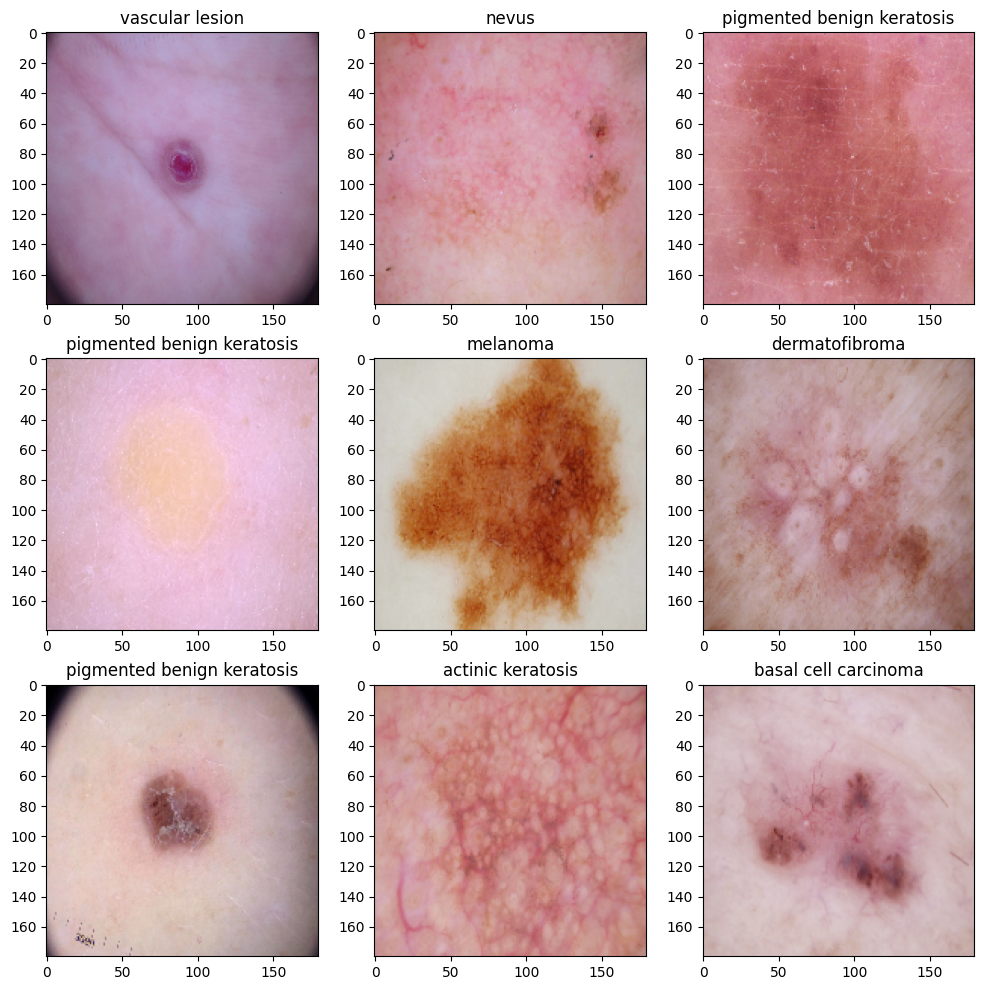

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
for images, labels in train_ds.take(1):
  for i in np.arange(0,9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
num_classes=9
model=Sequential([layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
                 layers.Conv2D(16,3,padding='same',activation='relu'),
                 layers.MaxPooling2D(),
                 layers.Conv2D(32,3,padding='same',activation='relu'),
                 layers.MaxPooling2D(),
                 layers.Conv2D(64,3,padding='same',activation='relu'),
                 layers.MaxPooling2D(),
                 layers.Conv2D(128,3,padding='same',activation='relu'),
                 layers.MaxPooling2D(),
                 layers.Dropout(0.2),
                 layers.Flatten(),
                 layers.Dense(256,activation='relu'),
                 layers.Dense(num_classes)])


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [13]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 179s 716ms/step - loss: 1.9354 - accuracy: 0.2874 - val_loss: 1.9908 - val_accuracy: 0.2394
Epoch 2/20
56/56 [==============================] - 2s 30ms/step - loss: 1.6598 - accuracy: 0.3973 - val_loss: 1.6254 - val_accuracy: 0.3893
Epoch 3/20
56/56 [==============================] - 2s 30ms/step - loss: 1.6118 - accuracy: 0.4135 - val_loss: 1.7064 - val_accuracy: 0.3669
Epoch 4/20
56/56 [==============================] - 2s 30ms/step - loss: 1.5578 - accuracy: 0.4297 - val_loss: 1.5094 - val_accuracy: 0.4743
Epoch 5/20
56/56 [==============================] - 2s 32ms/step - loss: 1.4413 - accuracy: 0.4922 - val_loss: 1.4238 - val_accuracy: 0.5123
Epoch 6/20
56/56 [==============================] - 2s 32ms/step - loss: 1.3449 - accuracy: 0.5246 - val_loss: 1.4296 - val_accuracy: 0.5101
Epoch 7/20
56/56 [==============================] - 2s 32ms/step - loss: 1.2834 - accuracy: 0.5435 - val_loss: 1.4203 - val_accuracy: 0.5011
Epoch 8/20

### Visualizing training results

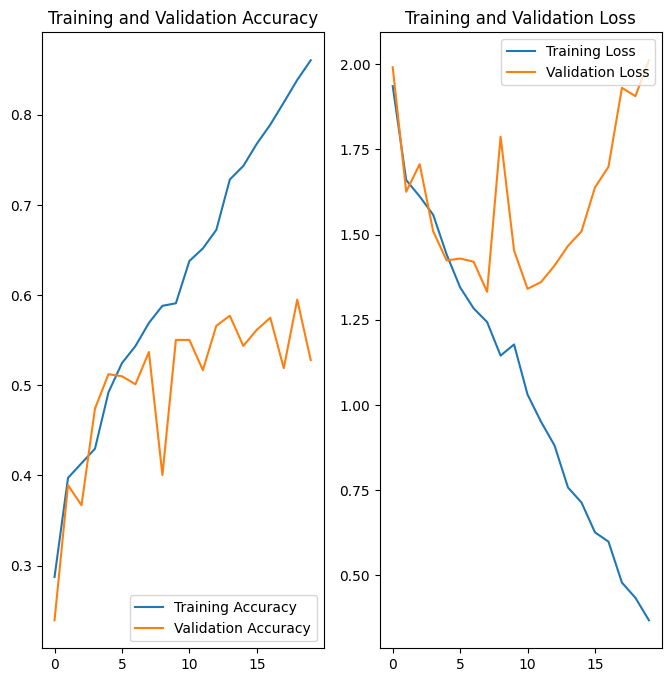

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### From the above graph and accuracy over training and validation data, it can be observed that the there is big difference in training accuracy and validation accuracy, so it can be concluded that the model is overfitted

### Write your findings here

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
data_augmentation=Sequential([layers.experimental.preprocessing.RandomFlip( 'horizontal_and_vertical',
                                                                           input_shape=(img_height,
                                                                                        img_width,
                                                                                        3)),
                             layers.experimental.preprocessing.RandomRotation(0.3),
                             layers.experimental.preprocessing.RandomZoom(0.3)])

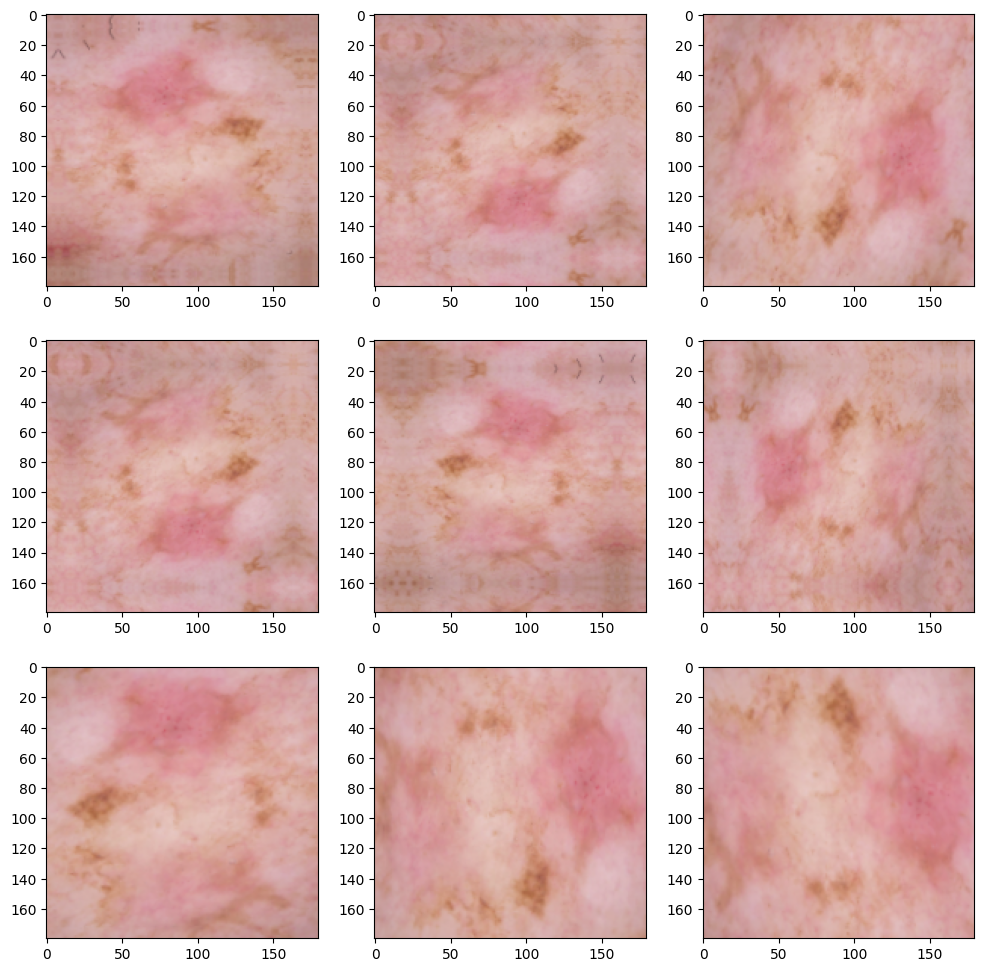

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(12,12))
for images, _ in train_ds.take(1):
  for i in range (0,9):
    augmented_images=data_augmentation(images)
    plt.subplot (3,3,i+1)
    plt.imshow(augmented_images[0].numpy().astype('uint8'))


### Todo:
### Create the model, compile and train the model


In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model=Sequential([layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
                 layers.Conv2D(16,3,padding='same',activation='relu'),
                 layers.MaxPooling2D(),
                 layers.Conv2D(32,3,padding='same',activation='relu'),
                 layers.MaxPooling2D(),
                 layers.Conv2D(64,3,padding='same',activation='relu'),
                 layers.MaxPooling2D(),
                 layers.Conv2D(128,3,padding='same',activation='relu'),
                 layers.MaxPooling2D(),
                 layers.Dropout(0.2),
                 layers.Flatten(),
                 layers.Dense(256,activation='relu'),
                 layers.Dense(num_classes)])


### Compiling the model

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [21]:
## Your code goes here, note: train your model for 20 epochs
epochs=20
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=epochs)

Epoch 1/20
56/56 [==============================] - 4s 34ms/step - loss: 2.0483 - accuracy: 0.1970 - val_loss: 1.9748 - val_accuracy: 0.2394
Epoch 2/20
56/56 [==============================] - 2s 31ms/step - loss: 1.8701 - accuracy: 0.3248 - val_loss: 1.7716 - val_accuracy: 0.3557
Epoch 3/20
56/56 [==============================] - 2s 32ms/step - loss: 1.6392 - accuracy: 0.4023 - val_loss: 1.5793 - val_accuracy: 0.4094
Epoch 4/20
56/56 [==============================] - 2s 31ms/step - loss: 1.5268 - accuracy: 0.4459 - val_loss: 1.4431 - val_accuracy: 0.4899
Epoch 5/20
56/56 [==============================] - 2s 30ms/step - loss: 1.4313 - accuracy: 0.4961 - val_loss: 1.4484 - val_accuracy: 0.5145
Epoch 6/20
56/56 [==============================] - 2s 30ms/step - loss: 1.3833 - accuracy: 0.5167 - val_loss: 1.3844 - val_accuracy: 0.5280
Epoch 7/20
56/56 [==============================] - 2s 30ms/step - loss: 1.2874 - accuracy: 0.5519 - val_loss: 1.3882 - val_accuracy: 0.5011
Epoch 8/20
56

### Visualizing the results

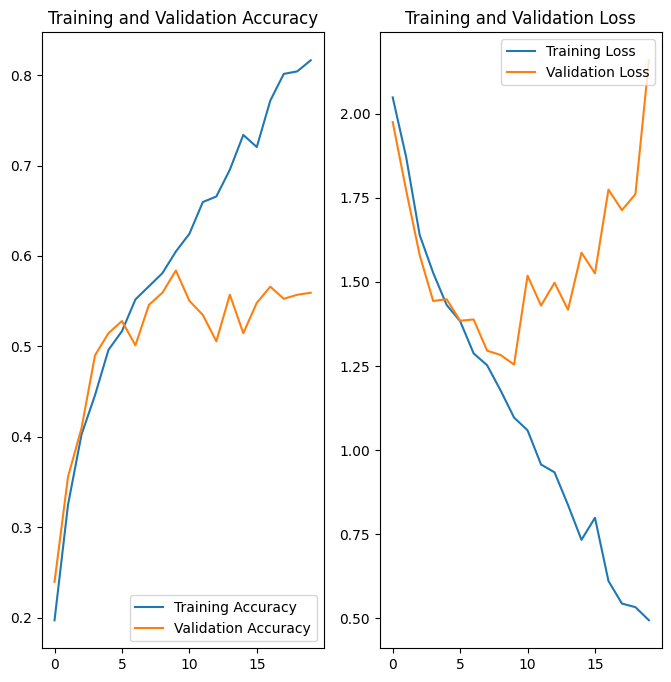

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### From the charts it can be seen that there is not that much imrpovement as compare to previous model

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [23]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [24]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,drive/MyDrive/AIML EXERCISE/CNN_assignment/Ski...,dermatofibroma
1,drive/MyDrive/AIML EXERCISE/CNN_assignment/Ski...,dermatofibroma
2,drive/MyDrive/AIML EXERCISE/CNN_assignment/Ski...,dermatofibroma
3,drive/MyDrive/AIML EXERCISE/CNN_assignment/Ski...,dermatofibroma
4,drive/MyDrive/AIML EXERCISE/CNN_assignment/Ski...,dermatofibroma
...,...,...
2234,drive/MyDrive/AIML EXERCISE/CNN_assignment/Ski...,seborrheic keratosis
2235,drive/MyDrive/AIML EXERCISE/CNN_assignment/Ski...,seborrheic keratosis
2236,drive/MyDrive/AIML EXERCISE/CNN_assignment/Ski...,seborrheic keratosis
2237,drive/MyDrive/AIML EXERCISE/CNN_assignment/Ski...,seborrheic keratosis


Class=2, n=95 (4.243%)
Class=1, n=376 (16.793%)
Class=7, n=181 (8.084%)
Class=4, n=357 (15.945%)
Class=0, n=114 (5.092%)
Class=3, n=438 (19.562%)
Class=8, n=139 (6.208%)
Class=5, n=462 (20.634%)
Class=6, n=77 (3.439%)


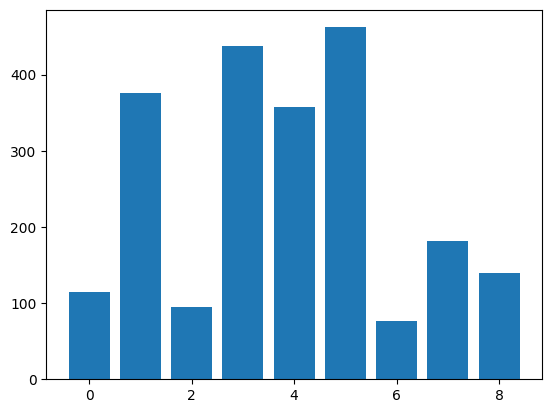

In [25]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

From above charts and summary it is observed that, class 6 has least sample with 77 numbers and class 5 has most samples with 462 numbers

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [26]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [27]:
path_to_training_dataset="drive/MyDrive/AIML EXERCISE/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to drive/MyDrive/AIML EXERCISE/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7BA33A5B7B20>: 100%|██████████| 500/500 [00:19<00:00, 25.26 Samples/s]


Initialised with 376 image(s) found.
Output directory set to drive/MyDrive/AIML EXERCISE/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7BA2949A3FA0>: 100%|██████████| 500/500 [00:23<00:00, 21.36 Samples/s]


Initialised with 95 image(s) found.
Output directory set to drive/MyDrive/AIML EXERCISE/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7BA294AC3D60>: 100%|██████████| 500/500 [00:21<00:00, 23.56 Samples/s]


Initialised with 438 image(s) found.
Output directory set to drive/MyDrive/AIML EXERCISE/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7BA2949CFB50>: 100%|██████████| 500/500 [01:21<00:00,  6.11 Samples/s]


Initialised with 357 image(s) found.
Output directory set to drive/MyDrive/AIML EXERCISE/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7BA294006770>: 100%|██████████| 500/500 [01:24<00:00,  5.93 Samples/s]


Initialised with 462 image(s) found.
Output directory set to drive/MyDrive/AIML EXERCISE/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7BA29400C100>: 100%|██████████| 500/500 [00:17<00:00, 28.68 Samples/s]


Initialised with 77 image(s) found.
Output directory set to drive/MyDrive/AIML EXERCISE/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7BA2949CD6F0>: 100%|██████████| 500/500 [00:37<00:00, 13.51 Samples/s]


Initialised with 181 image(s) found.
Output directory set to drive/MyDrive/AIML EXERCISE/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7BA2949E4490>: 100%|██████████| 500/500 [00:18<00:00, 27.04 Samples/s]


Initialised with 139 image(s) found.
Output directory set to drive/MyDrive/AIML EXERCISE/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7BA294D2BF10>: 100%|██████████| 500/500 [00:18<00:00, 27.64 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [28]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [29]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['drive/MyDrive/AIML EXERCISE/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0030015.jpg_5cfff51a-fc2e-41a2-ab30-a27c13d4fb11.jpg',
 'drive/MyDrive/AIML EXERCISE/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0033860.jpg_84dcdee4-b3fe-4bdc-a462-e737351f81bd.jpg',
 'drive/MyDrive/AIML EXERCISE/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0028346.jpg_cfd27f7a-c3ac-4bab-9f3d-83ad0e9690e1.jpg',
 'drive/MyDrive/AIML EXERCISE/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0030830.jpg_9b7e5f3c-0ec4-4107-b1b0-3b39795559e6.jpg',
 'drive/MyDrive/AIML EXERCISE/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibr

In [30]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofib

In [31]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [32]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-32-17a6b079869a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [33]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [34]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [35]:
##data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [36]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ='validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [37]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model=Sequential([layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
                 layers.Conv2D(16,3,padding='same',activation='relu'),
                 layers.MaxPooling2D(),
                 layers.Conv2D(32,3,padding='same',activation='relu'),
                 layers.MaxPooling2D(),
                 layers.Conv2D(64,3,padding='same',activation='relu'),
                 layers.MaxPooling2D(),
                 layers.Conv2D(128,3,padding='same',activation='relu'),
                 layers.MaxPooling2D(),
                 layers.Dropout(0.2),
                 layers.Flatten(),
                 layers.Dense(256,activation='relu'),
                 layers.Dense(num_classes)])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [39]:
epochs = 50
## Your code goes here, use 50 epochs.
history =  model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 56s 80ms/step - loss: 1.8050 - accuracy: 0.3216 - val_loss: 1.4006 - val_accuracy: 0.4937
Epoch 2/50
169/169 [==============================] - 5s 30ms/step - loss: 1.4087 - accuracy: 0.4727 - val_loss: 1.3394 - val_accuracy: 0.4907
Epoch 3/50
169/169 [==============================] - 5s 30ms/step - loss: 1.2343 - accuracy: 0.5384 - val_loss: 1.3305 - val_accuracy: 0.5271
Epoch 4/50
169/169 [==============================] - 5s 31ms/step - loss: 1.0180 - accuracy: 0.6244 - val_loss: 1.0998 - val_accuracy: 0.6117
Epoch 5/50
169/169 [==============================] - 5s 30ms/step - loss: 0.8344 - accuracy: 0.6958 - val_loss: 0.8539 - val_accuracy: 0.7231
Epoch 6/50
169/169 [==============================] - 5s 32ms/step - loss: 0.6684 - accuracy: 0.7550 - val_loss: 0.7728 - val_accuracy: 0.7365
Epoch 7/50
169/169 [==============================] - 5s 30ms/step - loss: 0.5697 - accuracy: 0.7876 - val_loss: 0.7486 - val_accuracy: 0.758

#### **Todo:**  Visualize the model results

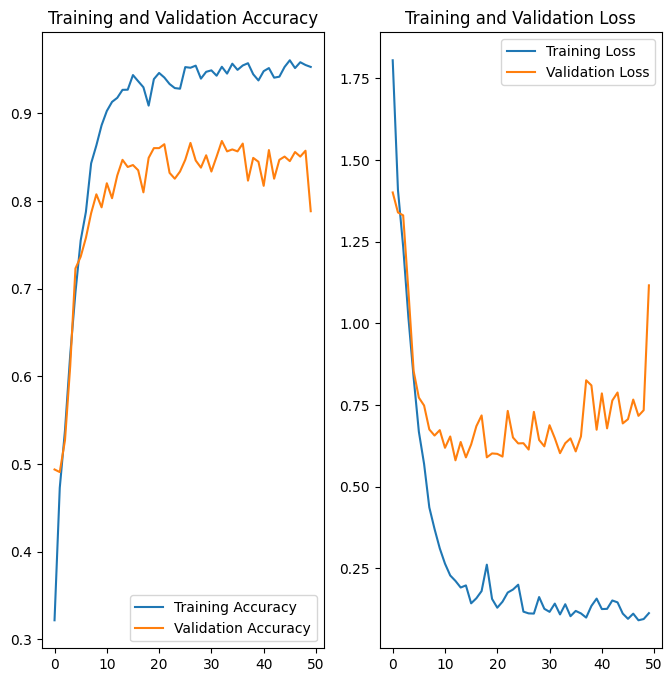

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Finally after class rebalancing, the model is better fitted with accuracy of training and validation is nearly same.Class rebalancing is great technique to overcome underfitting/overfitting

